<a href="https://colab.research.google.com/github/VaishaliChauhanCCTB/Demo/blob/main/eda_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries and Load Data

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('sample_data/CustomData/exercise_data.csv')
data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0


**Step 2: Check Dataset Info**
Objective: Understand data types and check for missing values.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


Step 3: Statistical Summary
Objective: Get insights into numerical columns such as mean, min, max, etc.

In [4]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


Step 4: Missing Values Analysis
Objective: Check which columns have missing values and their count.

In [5]:
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


**Step 5: Data Distribution and Visualization**
Check Distribution of Duration

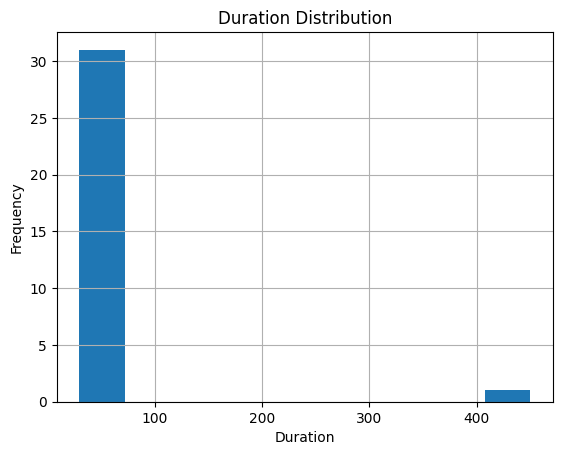

In [6]:
import matplotlib.pyplot as plt
data['Duration'].hist(bins=10)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


Analyze Pulse and Maxpulse

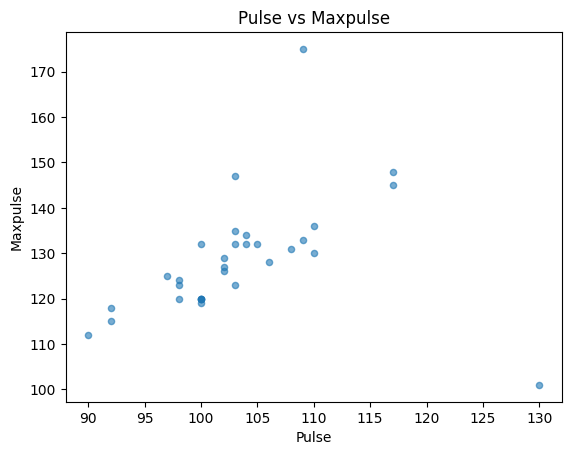

In [7]:
data.plot(kind='scatter', x='Pulse', y='Maxpulse', alpha=0.6)
plt.title('Pulse vs Maxpulse')
plt.show()


Calories Distribution

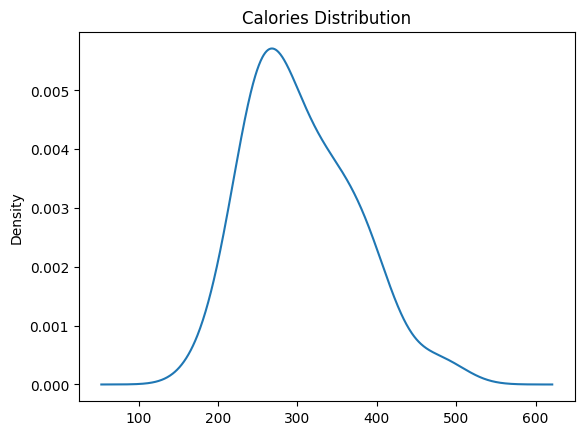

In [8]:
data['Calories'].plot(kind='kde', title='Calories Distribution')
plt.show()


Step 6: Correlation Analysis
Objective: Understand relationships between numerical variables.

Correlation Matrix:
          Duration     Pulse  Maxpulse  Calories
Duration  1.000000  0.004410  0.049959 -0.113923
Pulse     0.004410  1.000000  0.276583  0.487017
Maxpulse  0.049959  0.276583  1.000000  0.347419
Calories -0.113923  0.487017  0.347419  1.000000


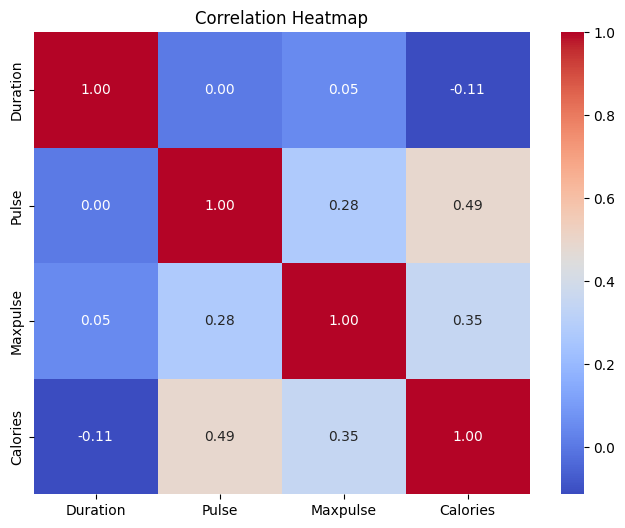

In [17]:
# correlation_matrix = data.corr()
# correlation_matrix
import seaborn as sns
# Remove the 'Date' column for correlation analysis
numerical_data = data.drop(columns=['Date'])

# Generate the correlation matrix
correlation_matrix = numerical_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Step 2: Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Step 3: Display the heatmap
plt.title('Correlation Heatmap')
plt.show()



Step 7: Data Cleaning
A) Check for Duplicates

In [12]:
data.duplicated().sum()

1

Handle Missing Values

In [13]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())


Date Formatting

In [14]:
# data['Date'] = pd.to_datetime(data['Date'])


ValueError: time data "13-12-2020" doesn't match format "%m-%d-%Y", at position 13. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Step 8: Create Insights
Average calories burned per duration:

In [15]:
data.groupby('Duration')['Calories'].mean()


,Calories
Duration,
30,195.100000
45,294.013333
60,314.053333
450,253.300000


In [19]:
import pandas as pd

# Sample DataFrame with 'Date' column
data = pd.DataFrame({
    'Date': ['01-12-2020', '02-12-2021', '03-12-2020', '04-12-2020']
})

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract the year and create a new column 'Year'
data['Year'] = data['Date'].dt.year

# Display the DataFrame
print(data)


        Date  Year
0 2020-12-01  2020
1 2021-12-02  2021
2 2020-12-03  2020
3 2020-12-04  2020


In [21]:
#Filling missing values:
import pandas as pd
import numpy as np

# Example DataFrame
data = pd.DataFrame({
    'Age': [25, 30, np.nan, 35, 40],
    'Salary': [50000, 60000, 55000, np.nan, 65000],
    'City': ['New York', 'San Francisco', np.nan, 'Chicago', 'New York']
})

print(data)

# Fill numerical columns with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Salary'] = data['Salary'].fillna(data['Salary'].median())

# Fill categorical column with mode
data['City'] = data['City'].fillna(data['City'].mode()[0])

print(data)


    Age   Salary           City
0  25.0  50000.0       New York
1  30.0  60000.0  San Francisco
2   NaN  55000.0            NaN
3  35.0      NaN        Chicago
4  40.0  65000.0       New York
    Age   Salary           City
0  25.0  50000.0       New York
1  30.0  60000.0  San Francisco
2  32.5  55000.0       New York
3  35.0  57500.0        Chicago
4  40.0  65000.0       New York


Distribution of activities over time:

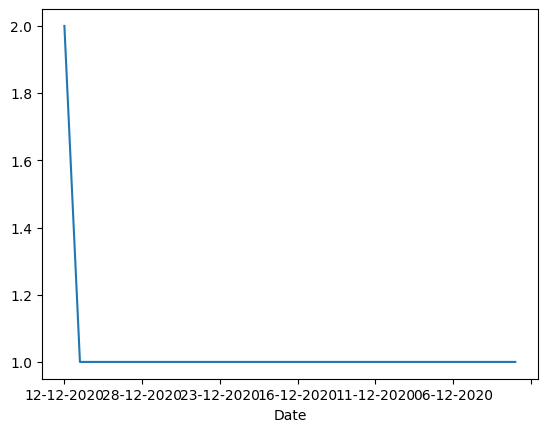

In [16]:
# data['Date'].value_counts().plot(kind='line')
# plt.show()
